In [2]:
# all linear regression libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# read data
data = pd.read_csv('../data/financial_loan.csv')
print(data.shape)
data.head()


(38576, 24)


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


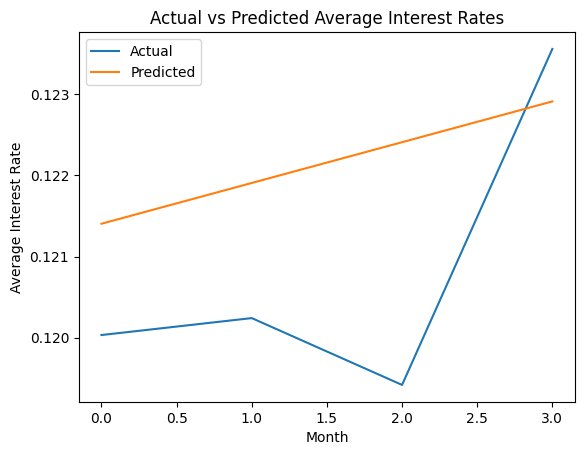

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/financial_loan.csv')

# Convert the 'issue_date' column to datetime
df['DATE'] = pd.to_datetime(df['issue_date'])

# Extract the month from the date
df['month'] = df['DATE'].dt.month

# Group by month and calculate the average interest rate
df_grouped = df.groupby('month')['int_rate'].mean().reset_index()

# Select the first 8 months for training and the next 4 months for testing
train = df_grouped[df_grouped['month'] <= 12]
test = df_grouped[(df_grouped['month'] > 8) & (df_grouped['month'] <= 12)]

# Create and train the model
model = LinearRegression()
model.fit(train[['month']], train['int_rate'])

# Make predictions on the test set
predictions = model.predict(test[['month']])

# Create a dataframe for plotting
df_plot = pd.DataFrame({'Actual': test['int_rate'], 'Predicted': predictions})

# Reset the index for plotting
df_plot = df_plot.reset_index(drop=True)

# Plot actual vs predicted values
plt.plot(df_plot['Actual'], label='Actual')
plt.plot(df_plot['Predicted'], label='Predicted')
plt.xlabel('Month')
plt.ylabel('Average Interest Rate')
plt.title('Actual vs Predicted Average Interest Rates')
plt.legend()
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/financial_loan.csv')

# find total number of unique values in the 'issue_date' column
print(df['issue_date'].nunique())

# # plot the average interest rate per available day of the month
# df.groupby('issue_date')['int_rate'].mean().plot()

# # smoothen the plot by taking the rolling average
# df.groupby('issue_date')['int_rate'].mean().rolling(5).mean().plot()

65
